#### <center> **LSTM (Dataset: Amazon & Cisco)**

#### **A. Eksplorasi dan Praproses Data**

- Eksplorasi data dan plotting
- Pemisahan data sesuai input dan output (window size dan horizon)
- Pemisahan data menjadi training, testing, dan validation set

- ##### **Eksplorasi dan plotting data**

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df_amazon = pd.read_csv("AMZN.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df_amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [52]:
df_cisco = pd.read_csv("CSCO.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df_cisco.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-02-16,0.0,0.079861,0.073785,0.077257,0.059806,940636800
1990-02-20,0.0,0.079861,0.074653,0.079861,0.061822,151862400
1990-02-21,0.0,0.078993,0.075521,0.078125,0.060478,70531200
1990-02-22,0.0,0.081597,0.078993,0.078993,0.061150,45216000
1990-02-23,0.0,0.079861,0.078125,0.078559,0.060814,44697600


In [53]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5758 entries, 1997-05-15 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5758 non-null   float64
 1   High       5758 non-null   float64
 2   Low        5758 non-null   float64
 3   Close      5758 non-null   float64
 4   Adj Close  5758 non-null   float64
 5   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 314.9 KB


In [54]:
df_cisco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7589 entries, 1990-02-16 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7589 non-null   float64
 1   High       7589 non-null   float64
 2   Low        7589 non-null   float64
 3   Close      7589 non-null   float64
 4   Adj Close  7589 non-null   float64
 5   Volume     7589 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 415.0 KB


In [55]:
len(df_amazon)

5758

In [56]:
len(df_cisco)

7589

In [57]:
df_amazon = pd.DataFrame(df_amazon["Close"])
df_amazon.head()

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [58]:
df_cisco = pd.DataFrame(df_cisco["Close"])
df_cisco.head()

,Close
Date,
1990-02-16,0.077257
1990-02-20,0.079861
1990-02-21,0.078125
1990-02-22,0.078993
1990-02-23,0.078559


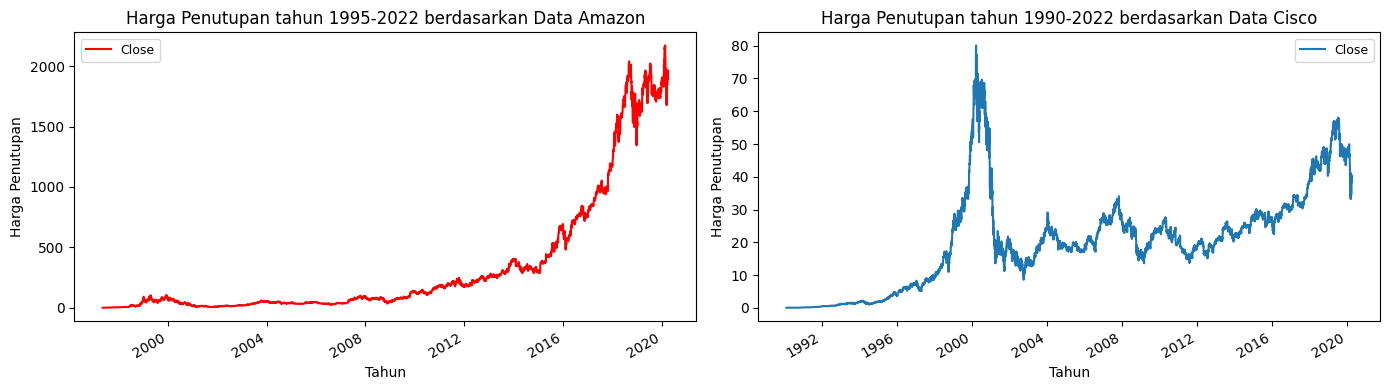

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

df_amazon.plot(ax=axes[0], legend=True, color='red')
axes[0].set_ylabel("Harga Penutupan")
axes[0].set_xlabel("Tahun")
axes[0].set_title("Harga Penutupan tahun 1995-2022 berdasarkan Data Amazon", fontsize=12)
axes[0].legend(fontsize=9)

df_cisco.plot(ax=axes[1], legend=True)
axes[1].set_ylabel("Harga Penutupan")
axes[1].set_xlabel("Tahun")
axes[1].set_title("Harga Penutupan tahun 1990-2022 berdasarkan Data Cisco", fontsize=12)
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()

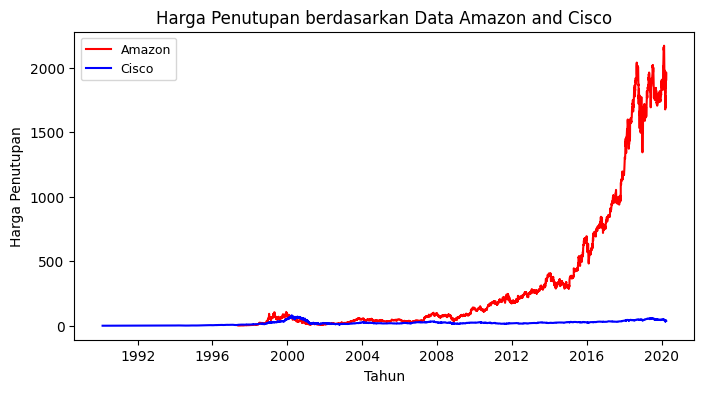

In [60]:
plt.figure(figsize=(8, 4))

plt.plot(df_amazon.index, df_amazon['Close'], color='red', label='Amazon')
plt.plot(df_cisco.index, df_cisco['Close'], color='blue', label='Cisco')

plt.xlabel("Tahun")
plt.ylabel("Harga Penutupan")
plt.title("Harga Penutupan berdasarkan Data Amazon and Cisco", fontsize=12)
plt.legend(fontsize=9)

plt.show()

- ##### **Pemisahan bagian window & horizon (window: 5, horizon: 1) atau input dan output**

In [61]:
window_size = 5
horizon = 1 

In [62]:
date_amazon = df_amazon.index.to_numpy()
close_amazon = df_amazon["Close"].to_numpy()

date_cisco = df_cisco.index.to_numpy()
close_cisco = df_cisco["Close"].to_numpy()

In [63]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [64]:
def make_windows(x, window_size=5, horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [65]:
# Amazon data
full_windows_amazon, full_labels_amazon = make_windows(close_amazon, window_size=window_size, horizon=horizon)
len(full_windows_amazon), len(full_labels_amazon)

(5753, 5753)

In [66]:
# Cisco data
full_windows_cisco, full_labels_cisco = make_windows(close_cisco, window_size=window_size, horizon=horizon)
len(full_windows_cisco), len(full_labels_cisco)

(7584, 7584)

In [67]:
# Amazon data
print('Amazon Data')
for i in range(3):
  print(f"Window: {full_windows_amazon[i]} -> Label: {full_labels_amazon[i]}")

print('\nCisco Data')
# Cisco data
for i in range(3):
  print(f"Window: {full_windows_cisco[i]} -> Label: {full_labels_cisco[i]}")

Amazon Data
Window: [1.95833337 1.72916663 1.70833337 1.63541663 1.42708337] -> Label: [1.39583337]
Window: [1.72916663 1.70833337 1.63541663 1.42708337 1.39583337] -> Label: [1.5]
Window: [1.70833337 1.63541663 1.42708337 1.39583337 1.5       ] -> Label: [1.58333337]

Cisco Data
Window: [0.07725695 0.07986111 0.078125   0.07899305 0.07855903] -> Label: [0.07638889]
Window: [0.07986111 0.078125   0.07899305 0.07855903 0.07638889] -> Label: [0.078125]
Window: [0.078125   0.07899305 0.07855903 0.07638889 0.078125  ] -> Label: [0.08072916]


- ##### **Pembagian data (train: 80, validation: 10, test: 10) dengan windowing**

In [68]:
def make_train_val_test_splits(windows, labels, val_split=0.1, test_split=0.1):
    test_size = int(len(windows) * test_split)
    val_size = int(len(windows) * val_split)
    train_size = len(windows) - val_size - test_size

    train_windows = windows[:train_size]
    val_windows = windows[train_size:train_size + val_size]
    test_windows = windows[train_size + val_size:]
    
    train_labels = labels[:train_size]
    val_labels = labels[train_size:train_size + val_size]
    test_labels = labels[train_size + val_size:]
    
    return train_windows, val_windows, test_windows, train_labels, val_labels, test_labels

In [69]:
# Amazon data
train_windows_amazon, val_windows_amazon, test_windows_amazon, train_labels_amazon, val_labels_amazon, test_labels_amazon = make_train_val_test_splits(full_windows_amazon, full_labels_amazon)

print("Amazon Data\n")
print(f"Full windows: {len(full_windows_amazon)}")
print(f"Full labels: {len(full_labels_amazon)}\n")
print(f"Training windows: {len(train_windows_amazon)}")
print(f"Training labels: {len(train_labels_amazon)}\n")
print(f"Testing windows: {len(test_windows_amazon)}")
print(f"Testing labels: {len(test_labels_amazon)}\n")
print(f"Validation windows: {len(val_windows_amazon)}")
print(f"Validation labels: {len(val_labels_amazon)}")

Amazon Data

Full windows: 5753
Full labels: 5753

Training windows: 4603
Training labels: 4603

Testing windows: 575
Testing labels: 575

Validation windows: 575
Validation labels: 575


In [70]:
# Cisco data
train_windows_cisco, val_windows_cisco, test_windows_cisco, train_labels_cisco, val_labels_cisco, test_labels_cisco = make_train_val_test_splits(full_windows_cisco, full_labels_cisco)

print("Cisco Data\n")
print(f"Full windows: {len(full_windows_cisco)}")
print(f"Full labels: {len(full_labels_cisco)}\n")
print(f"Training windows: {len(train_windows_cisco)}")
print(f"Training labels: {len(train_labels_cisco)}\n")
print(f"Testing windows: {len(test_windows_cisco)}")
print(f"Testing labels: {len(test_labels_cisco)}\n")
print(f"Validation windows: {len(val_windows_cisco)}")
print(f"Validation labels: {len(val_labels_cisco)}")

Cisco Data

Full windows: 7584
Full labels: 7584

Training windows: 6068
Training labels: 6068

Testing windows: 758
Testing labels: 758

Validation windows: 758
Validation labels: 758


In [71]:
# Amazon data
train_windows_amazon[:5], train_labels_amazon[:5]

(array([[1.95833337, 1.72916663, 1.70833337, 1.63541663, 1.42708337],
        [1.72916663, 1.70833337, 1.63541663, 1.42708337, 1.39583337],
        [1.70833337, 1.63541663, 1.42708337, 1.39583337, 1.5       ],
        [1.63541663, 1.42708337, 1.39583337, 1.5       , 1.58333337],
        [1.42708337, 1.39583337, 1.5       , 1.58333337, 1.53125   ]]),
 array([[1.39583337],
        [1.5       ],
        [1.58333337],
        [1.53125   ],
        [1.50520837]]))

In [72]:
# Cisco data
train_windows_cisco[:5], train_labels_cisco[:5]

(array([[0.07725695, 0.07986111, 0.078125  , 0.07899305, 0.07855903],
        [0.07986111, 0.078125  , 0.07899305, 0.07855903, 0.07638889],
        [0.078125  , 0.07899305, 0.07855903, 0.07638889, 0.078125  ],
        [0.07899305, 0.07855903, 0.07638889, 0.078125  , 0.08072916],
        [0.07855903, 0.07638889, 0.078125  , 0.08072916, 0.07986111]]),
 array([[0.07638889],
        [0.078125  ],
        [0.08072916],
        [0.07986111],
        [0.08072916]]))

- ##### **Pembagian data tanpa windowing**

> Digunakan untuk mengecek apakah array dari data sama untuk splitting data dengan windowing maupun tanpa windowing

In [73]:
train_proportion = 0.8
val_proportion = 0.1
test_proportion = 0.1

# Amazon data
train_split_amazon = int(train_proportion * len(close_amazon))
val_split_amazon = int((train_proportion + val_proportion) * len(close_amazon))

X_train_amazon, y_train_amazon = date_amazon[:train_split_amazon], close_amazon[:train_split_amazon]
X_val_amazon, y_val_amazon = date_amazon[train_split_amazon:val_split_amazon], close_amazon[train_split_amazon:val_split_amazon]
X_test_amazon, y_test_amazon = date_amazon[val_split_amazon:], close_amazon[val_split_amazon:]

# Cisco data
train_split_cisco = int(train_proportion * len(close_cisco))
val_split_cisco = int((train_proportion + val_proportion) * len(close_cisco))

X_train_cisco, y_train_cisco = date_cisco[:train_split_cisco], close_cisco[:train_split_cisco]
X_val_cisco, y_val_cisco = date_cisco[train_split_cisco:val_split_cisco], close_cisco[train_split_cisco:val_split_cisco]
X_test_cisco, y_test_cisco = date_cisco[val_split_cisco:], close_cisco[val_split_cisco:]

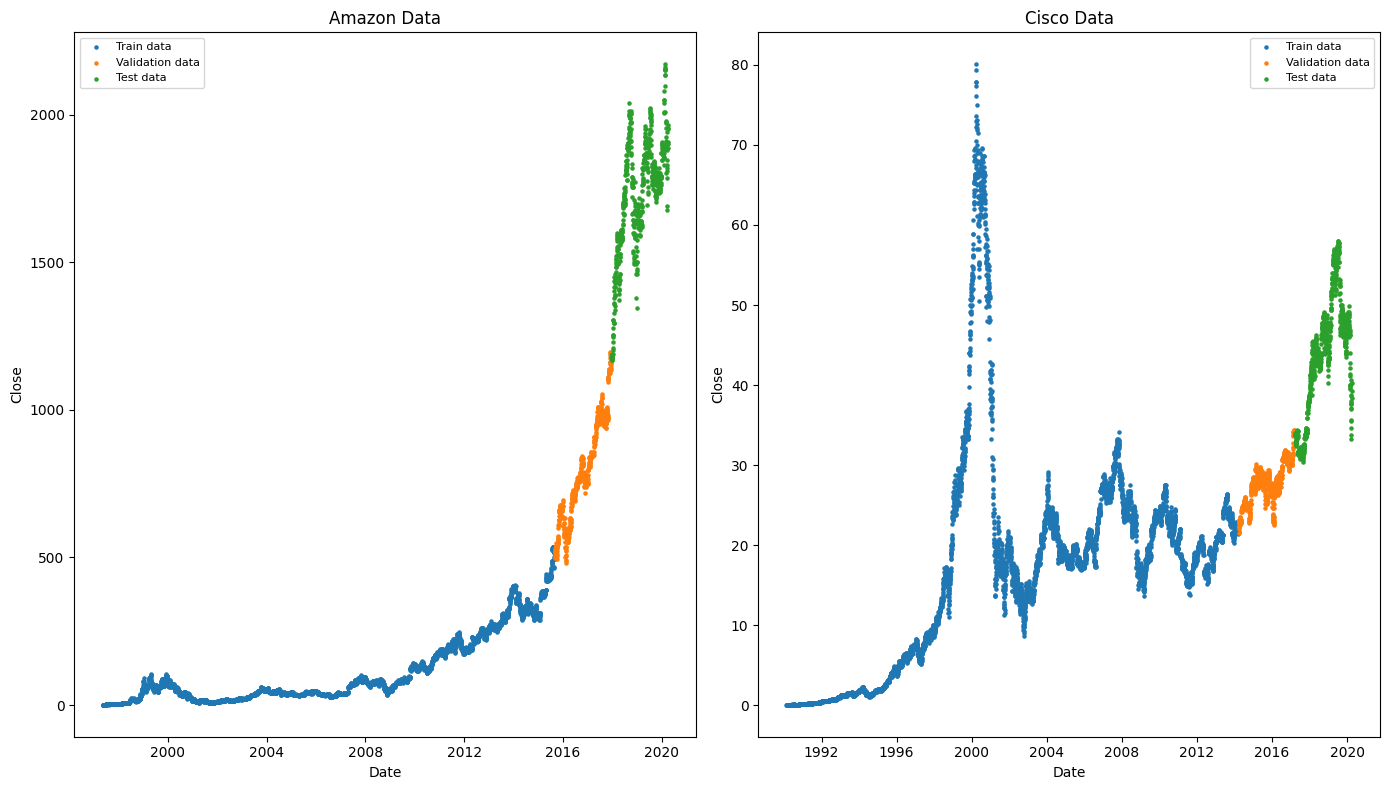

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))  

ax1.scatter(X_train_amazon, y_train_amazon, s=5, label="Train data")
ax1.scatter(X_val_amazon, y_val_amazon, s=5, label="Validation data")
ax1.scatter(X_test_amazon, y_test_amazon, s=5, label="Test data")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close")
ax1.set_title("Amazon Data")
ax1.legend(fontsize=8)

ax2.scatter(X_train_cisco, y_train_cisco, s=5, label="Train data")
ax2.scatter(X_val_cisco, y_val_cisco, s=5, label="Validation data")
ax2.scatter(X_test_cisco, y_test_cisco, s=5, label="Test data")
ax2.set_xlabel("Date")
ax2.set_ylabel("Close")
ax2.set_title("Cisco Data")
ax2.legend(fontsize=8)

plt.tight_layout()
plt.show()

In [75]:
# Cek apakah array berdimensi sama untuk splitting data dengan windowing & tanpa windowing

# Amazon data
np.array_equal(np.squeeze(train_labels_amazon[:-horizon-1]), y_train_amazon[window_size:])

True

In [76]:
# Cisco data
np.array_equal(np.squeeze(train_labels_cisco[:-horizon-1]), y_train_cisco[window_size:])

True

> Berdasarkan hasil kedua code di atas, array sudah berukuran sama. Hal ini menandakan splitting dengan windowing sudah sesuai.

In [77]:
# Amazon data
print('Amazon data')
print(np.squeeze(train_labels_amazon[:-horizon-1]))
print(y_train_amazon[window_size:])
print("\n")

# Cisco data
print('Cisco data')
print(np.squeeze(train_labels_cisco[:-horizon-1]))
print(y_train_cisco[window_size:])

Amazon data
[  1.39583337   1.5          1.58333337 ... 512.89001465 496.54000854
 510.54998779]
[  1.39583337   1.5          1.58333337 ... 512.89001465 496.54000854
 510.54998779]


Cisco data
[ 0.07638889  0.078125    0.08072916 ... 21.62999916 21.82999992
 21.63999939]
[ 0.07638889  0.078125    0.08072916 ... 21.62999916 21.82999992
 21.63999939]


#### **B. Arsitektur Baseline dengan LSTM**

- Pemodelan dengan baseline unit = 50, layer akhir (node perceptron) unit = 1, dan activation function = RelU
- Melakukan prediksi dan evaluasi pada arsitektur/model 1

In [78]:
import tensorflow as tf
from tensorflow.keras import layers

In [79]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    
    filepath = os.path.join(save_path, model_name + ".keras")
    return tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                              verbose=0,
                                              save_best_only=True)

- ##### **Pemodelan serta melihat training dan validation loss**

In [81]:
# Amazon data 
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(50, activation="relu")(x)

output = layers.Dense(horizon)(x)
lstm_model_amazon = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_amazon")

lstm_model_amazon.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_fit = lstm_model_amazon.fit(train_windows_amazon,
            train_labels_amazon,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_amazon, val_labels_amazon),
            callbacks=[create_model_checkpoint(model_name=lstm_model_amazon.name)])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 96.6131 - val_loss: 488.9638
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 48.0198 - val_loss: 18.8097
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.6445 - val_loss: 14.0446
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2756 - val_loss: 14.1251
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1835 - val_loss: 13.7828
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1304 - val_loss: 13.5793
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0815 - val_loss: 13.3793
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.0174 - val_loss: 13.3031
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8378 - val_loss: 12.7063
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4582 - val_loss: 19.7171
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7335 - val_loss: 13.0357
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━

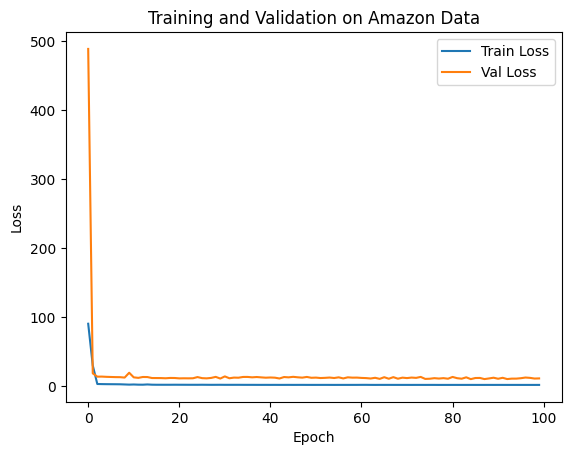

In [82]:
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation on Amazon Data')
plt.legend()
plt.show()

> Validation dan training menunjukkan initial loss yang tinggi dan kemudian turun sangat tajam ke value loss dari training data hampir 0. Hal ini menunjukkan bahwa model hampir fit dan konvergen dengan data training.  

> Gap antara validation dan training hanya kecil dan value loss nya rendah. Namun, validation loss sedikit lebih tinggi daripada training sehingga adanya indikasi sedikit underfit pada model.

In [83]:
# Cisco data 
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(50, activation="relu")(x)

output = layers.Dense(horizon)(x)
lstm_model_cisco = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_cisco")

lstm_model_cisco.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_fit = lstm_model_cisco.fit(train_windows_cisco,
            train_labels_cisco,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_cisco, val_labels_cisco),
            callbacks=[create_model_checkpoint(model_name=lstm_model_cisco.name)])

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 11.2830 - val_loss: 2.1851
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8427 - val_loss: 0.3223
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5408 - val_loss: 0.3348
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4879 - val_loss: 0.3169
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4401 - val_loss: 0.3133
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4162 - val_loss: 0.3039
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4054 - val_loss: 0.2982
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3966 - val_loss: 0.3264
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3925 - val_loss: 0.3802
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3938 - val_loss: 0.3609
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3892 - val_loss: 0.3316
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/ste

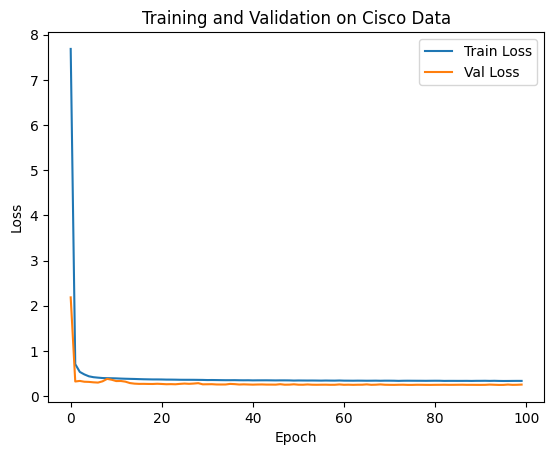

In [84]:
# Cisco data
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation on Cisco Data')
plt.legend()
plt.show()

> Validation dan training menunjukkan initial loss yang tidak setinggi pada Amazon data dan kemudian turun tajam ke value loss dari training & validation data hampir 0. Hal ini menunjukkan bahwa model sudah konvergen. Model dapat dengan cepat melihat pattern dari data pada epoch awal.

> Hampir tidak ada gap antara validation dan training dengan nilai loss yang rendah. Hal ini menunjukkan bahwa model sudah fit dengan training dan validation data.

- ##### **Membuat prediksi**

In [85]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [86]:
# Amazon data
lstm_pred_amazon = make_preds(lstm_model_amazon, test_windows_amazon)
lstm_pred_amazon[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1166.932 , 1171.4973, 1174.4303, 1176.8561, 1176.5627, 1175.3207,
       1173.7693, 1172.4142, 1174.3456, 1171.1777], dtype=float32)>

In [87]:
# Cisco data
lstm_pred_cisco = make_preds(lstm_model_cisco, test_windows_cisco)
lstm_pred_cisco[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.123417, 33.889446, 33.846516, 33.914814, 33.70659 , 33.535805,
       33.154087, 33.169098, 33.08378 , 33.096367], dtype=float32)>

> Hasil menunjukkan 10 prediksi pertama melalui prediksi pada data testing menggunakan model LSTM.

#### **C. Evaluasi Model 1 dan Modifikasi**

- Evaluasi model 1 (LSTM base architecture with 50 units input) dengan MAE, MSE, RMSE, dan MAPE
- Melihat plot fitting dari model
- Performa model 1 pada kedua dataset
- Modifikasi arsitektur

- ##### **Evaluasi model 1 untuk melihat performa model**

> Nilai MAE, MSEm dan RMSE menunjukkan skala error, sedangkan MAPE menunjukkan persentase error. Semakin rendah nilai tersebut, semakin baik performa model.

In [88]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    mae_metric.update_state(y_true, y_pred)
    mse_metric.update_state(y_true, y_pred)
    mape_metric.update_state(y_true, y_pred)

    mae = mae_metric.result().numpy()
    mse = mse_metric.result().numpy()
    rmse = tf.sqrt(mse_metric.result()).numpy()
    mape = mape_metric.result().numpy()

    return {"mae": mae,
            "mse": mse,
            "rmse": rmse,
            "mape": mape}

In [89]:
# Amazon data
lstm_eval_amazon = evaluate_preds(y_true=tf.squeeze(test_labels_amazon), y_pred=lstm_pred_amazon)
print('Model evaluation on Amazon data')
print(lstm_eval_amazon)

print(f"\nAverage close price dalam dataset: ", tf.reduce_mean(y_test_amazon).numpy())

Model evaluation on Amazon data
{'mae': 31.57484, 'mse': 1698.7118, 'rmse': 41.21543, 'mape': 1.8432143}

Average close price dalam dataset:  1730.3233150906033


> Secara keseluruhan, performa model sudah cukup baik mengingat nilai MAE, MSE, RMSE, dan MAPE sudah rendah.

> 'Average close price dalam dataset' digunakan untuk membandingan nilai MAE dengan nilai asli rata-rata close price pada test data. MAE 33.179 menunjukkan bahwa terdapat perbedaan sebesar 33.179 (rata-rata) pada prediksi dengan test data. Perbedaan ini tidak terlalu signifikan, tetapi dapat lebih baik.

In [90]:
# Cisco data

lstm_eval_cisco = evaluate_preds(y_true=tf.squeeze(test_labels_cisco), y_pred=lstm_pred_cisco)
print('Model evaluation on Cisco data')
print(lstm_eval_cisco)

print(f"\nAverage close price dalam dataset: ", tf.reduce_mean(y_test_cisco).numpy())

Model evaluation on Cisco data
{'mae': 0.5233823, 'mse': 0.6395053, 'rmse': 0.7996908, 'mape': 1.2029543}

Average close price dalam dataset:  43.53859022640585


> Secara keseluruhan, performa model sudah sangat baik mengingat nilai MAE, MSE, RMSE, dan MAPE sudah sangat rendah (mendekati 0).

> 'Average close price dalam dataset' digunakan untuk membandingan nilai MAE dengan nilai asli rata-rata close price pada test data. MAE 0.511 menunjukkan bahwa terdapat perbedaan sebesar 0.5112 (rata-rata) pada prediksi dengan test data. Perbedaan ini tergolong sangat kecil karena hampir 0.

- ##### **Plotting model untuk komparasi antara prediksi dengan data aslinya**

In [91]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Close Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

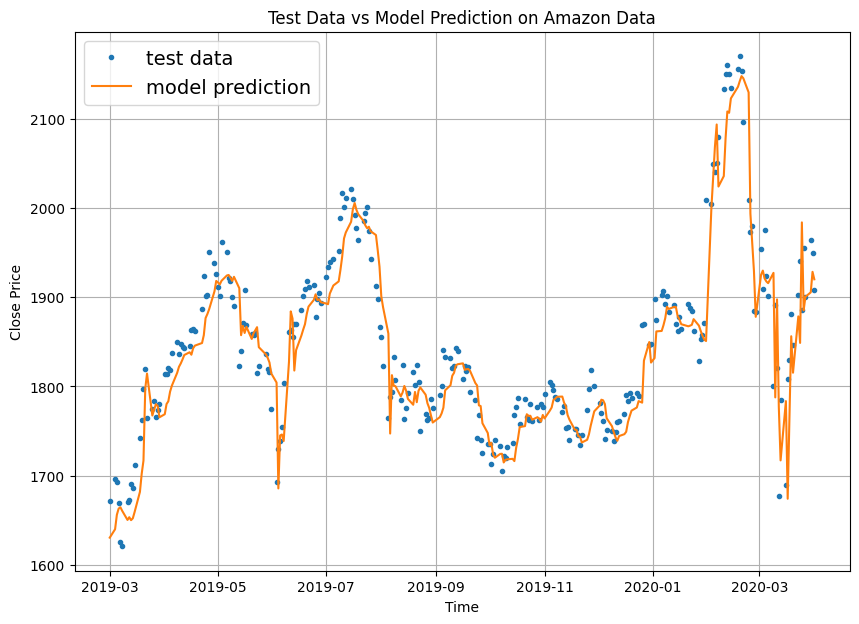

In [92]:
# Amazon data
offset = 300
plt.figure(figsize=(10, 7))
plt.title('Test Data vs Model Prediction on Amazon Data')
plot_time_series(timesteps=X_test_amazon[-len(test_windows_amazon):], values=test_labels_amazon[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test_amazon[-len(test_windows_amazon):], values=lstm_pred_amazon, start=offset, format="-", label="model prediction")

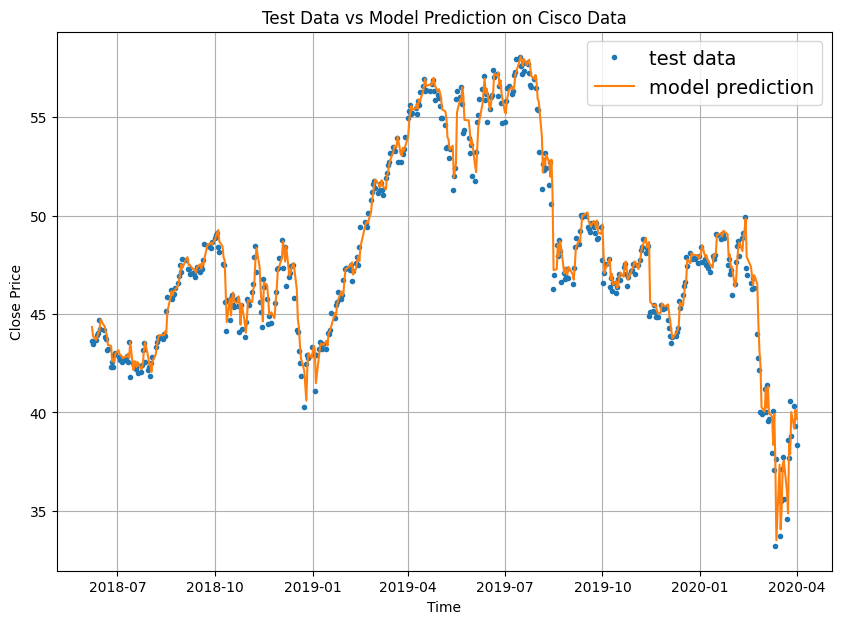

In [93]:
# Cisco data
offset = 300
plt.figure(figsize=(10, 7))
plt.title('Test Data vs Model Prediction on Cisco Data')
plot_time_series(timesteps=X_test_cisco[-len(test_windows_cisco):], values=test_labels_cisco[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test_cisco[-len(test_windows_cisco):], values=lstm_pred_cisco, start=offset, format="-", label="model prediction")

> Plotting data mendukung hasil dari evaluasi model. Dapat dilihat bahwa prediksi pada Cisco data lebih mendekati test data dibandingkan prediksi pada Amazon data.

- ##### **Performa arsitektur model 1 pada kedua dataset**

> Arsitektur model 1 memiliki performa, hasil prediksi, dan evaluasi yang lebih baik pada Cisco dataset dibandingkan dengan Amazon dataset.

- ##### **Modifikasi arsitektur model**

> Melihat hasil plotting validation dan training loss serta hasil evaluasi, model terindikasi sebagai berikut:

>> Pada Amazon dataset, terdapat indikasi underfit karena hasil validation yang lebih tinggi dan terdapat gap dengan training data. Oleh karena itu, model akan dibuat lebih canggih dengan menambah unit, regularisasi, dan learning rate.

>> Pada Cisco dataset, saya akan mencoba untuk sedikit mengurangi kompleksitas dari model sehingga tidak terlalu overfit.

In [157]:
# Amazon data (treat as underfit)
from tensorflow.keras import layers, regularizers

tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(150, activation="relu", return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(x)

output = layers.Dense(horizon)(x)
lstm_model_amazon = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_amazon")

lstm_model_amazon.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

lstm_model_amazon.summary()

Model: "lstm_model_amazon"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_21 (Lambda)              │ (None, 1, 5)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 1, 150)         │        93,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1, 1)           │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,751 (366.21 KB)

 Trainable params: 93,751 (366.21 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
model_fit = lstm_model_amazon.fit(train_windows_amazon,
            train_labels_amazon,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_amazon, val_labels_amazon),
            callbacks=[create_model_checkpoint(model_name=lstm_model_amazon.name)])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 108.7551 - val_loss: 751.3673
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 100.4804 - val_loss: 674.7615
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 89.0407 - val_loss: 530.6934
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 71.5021 - val_loss: 385.7644
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 50.8306 - val_loss: 225.2759
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 29.3881 - val_loss: 81.4924
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.9651 - val_loss: 14.6454
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.4560 - val_loss: 14.3191
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0587 - val_loss: 13.7614
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8821 - val_loss: 12.9683
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.7389 - val_loss: 12.4277
Epoch 12/100
36/36 ━━━━━━━━━

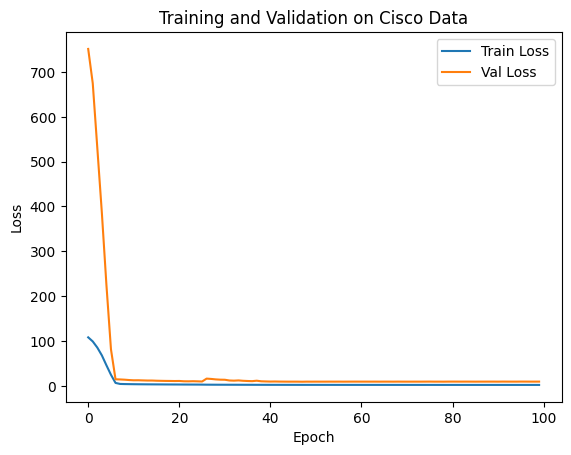

In [159]:
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation on Cisco Data')
plt.legend()
plt.show()

In [160]:
# Amazon data
lstm_pred_amazon = make_preds(lstm_model_amazon, test_windows_amazon)
lstm_pred_amazon[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1173.9005, 1181.0936, 1183.501 , 1183.9674, 1182.6129, 1179.5289,
       1178.2753, 1178.6287, 1181.6586, 1178.2025], dtype=float32)>

In [214]:
# Cisco data 
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(20, activation="relu", return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(x)

output = layers.Dense(horizon)(x)
lstm_model_cisco = tf.keras.Model(inputs=inputs, outputs=output, name="lstm_model_cisco")

lstm_model_cisco.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

lstm_model_cisco.summary()

Model: "lstm_model_cisco"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_32 (Lambda)              │ (None, 1, 5)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 1, 20)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1, 1)           │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,101 (8.21 KB)

 Trainable params: 2,101 (8.21 KB)

 Non-trainable params: 0 (0.00 B)

In [215]:
model_fit = lstm_model_cisco.fit(train_windows_cisco,
            train_labels_cisco,
            epochs=50,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_cisco, val_labels_cisco),
            callbacks=[create_model_checkpoint(model_name=lstm_model_cisco.name)])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 16.0804 - val_loss: 17.3039
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.2411 - val_loss: 0.5135
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5459 - val_loss: 0.3988
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.5064 - val_loss: 0.3765
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4913 - val_loss: 0.3660
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4810 - val_loss: 0.3591
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4713 - val_loss: 0.3519
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4629 - val_loss: 0.3455
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4540 - val_loss: 0.3419
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4451 - val_loss: 0.3358
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4363 - val_loss: 0.3505
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0

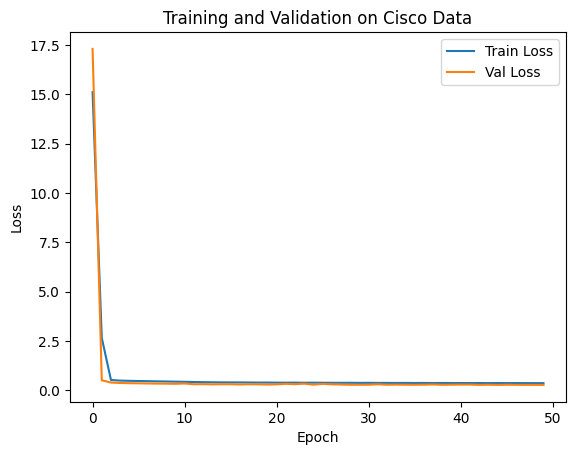

In [216]:
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation on Cisco Data')
plt.legend()
plt.show()

In [217]:
# Cisco data
lstm_pred_cisco = make_preds(lstm_model_cisco, test_windows_cisco)
lstm_pred_cisco[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.053967, 33.83141 , 33.777225, 33.847153, 33.633133, 33.47161 ,
       33.093437, 33.094902, 33.01343 , 33.01724 ], dtype=float32)>

#### **D. Evaluasi Model 2 (Model Setelah Modifikasi)**

In [175]:
# Amazon data
lstm_eval_amazon = evaluate_preds(y_true=tf.squeeze(test_labels_amazon), y_pred=lstm_pred_amazon)
print('Model evaluation on Amazon data')
print(lstm_eval_amazon)

print(f"\nAverage close price dalam dataset: ", tf.reduce_mean(y_test_amazon).numpy())

Model evaluation on Amazon data
{'mae': 29.100769, 'mse': 1602.8735, 'rmse': 40.035904, 'mape': 1.6975051}

Average close price dalam dataset:  1730.3233150906033


> Amazon data

>> Hasil model 1 
>> - MAE: 31.57484
>> - MSE: 1698.7118
>> - RMSE: 41.21543
>> - MAPE: 1.8432143

>> Hasil model 2 
>> - MAE: 29.100769
>> - MSE: 1602.8735
>> - RMSE: 40.035904
>> - MAPE: 1.6975051

> Dibandingkan dengan model 1, model 2 memiliki nilai MAE, MSE, RMSE, dan MAPE yang lebih rendah. Hal ini menunjukan bahwa modifikasi arsitektur dengan penambahan 100 units, L2 regularisasi sebanyak 0.01, dan learning rate 0.0001 dapat meningkatkan kinerja model.

In [218]:
# Cisco data
lstm_eval_cisco = evaluate_preds(y_true=tf.squeeze(test_labels_cisco), y_pred=lstm_pred_cisco)
print('Model evaluation on Cisco data')
print(lstm_eval_cisco)

print(f"\nAverage close price dalam dataset: ", tf.reduce_mean(y_test_cisco).numpy())

Model evaluation on Cisco data
{'mae': 0.5199646, 'mse': 0.63999295, 'rmse': 0.7999956, 'mape': 1.1931508}

Average close price dalam dataset:  43.53859022640585


> Cisco data

>> Hasil model 1 
>> - MAE: 0.5233823
>> - MSE: 0.6395053
>> - RMSE: 0.7996908
>> - MAPE: 1.2029543

>> Hasil model 2 
>> - MAE: 0.5199646
>> - MSE: 0.63999295
>> - RMSE: 0.7999956
>> - MAPE: 1.1931508

> Dibandingkan dengan model 1, model 2 memiliki nilai MAE dan MAPE yang lebih rendah. Nilai MSE dan RMSE sedikit lebih tinggi (0.0001). Hal ini menunjukan bahwa modifikasi arsitektur dengan pengurangan unit menjadi 20 units dan penambahan L2 regularisasi sebanyak 0.01 dapat sedikit meningkatkan kinerja model.

- ##### **Kesimpulan**

> Model 1 dengan 50 units sudah memiliki kinerja yang cukup optimal karena hasil evaluasi error yang rendah. Namun, kinerja model dapat lebih ditingkatkan kembali dengan modifikasi arsitektur untuk mendapatkan training dan validation loss yang rendah serta hasil error yang lebih rendah.

> Pada Amazon data, model dibuat lebih kompleks sedangkan pada Cisco data, model dibuat lebih simpel.